In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/hanyo/Downloads/heart.csv", index_col=0)
df

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [3]:
# 컬렴명 확인
df.columns

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
print(df[[
    'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
]].dtypes)


sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object


Text(0.5, 1.0, 'disease')

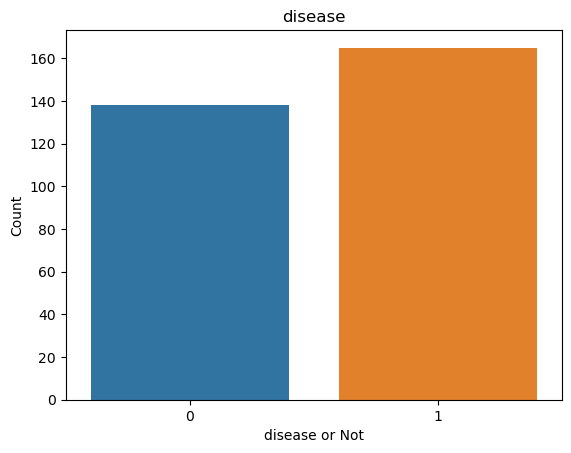

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="target")
plt.xlabel("disease or Not")
plt.ylabel("Count")
plt.title("disease")

In [6]:
# 레이블 갯수 확인 (숫자)
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# 중복 열 확인
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


C:\Users\hanyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hanyo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='chol', ylabel='Density'>

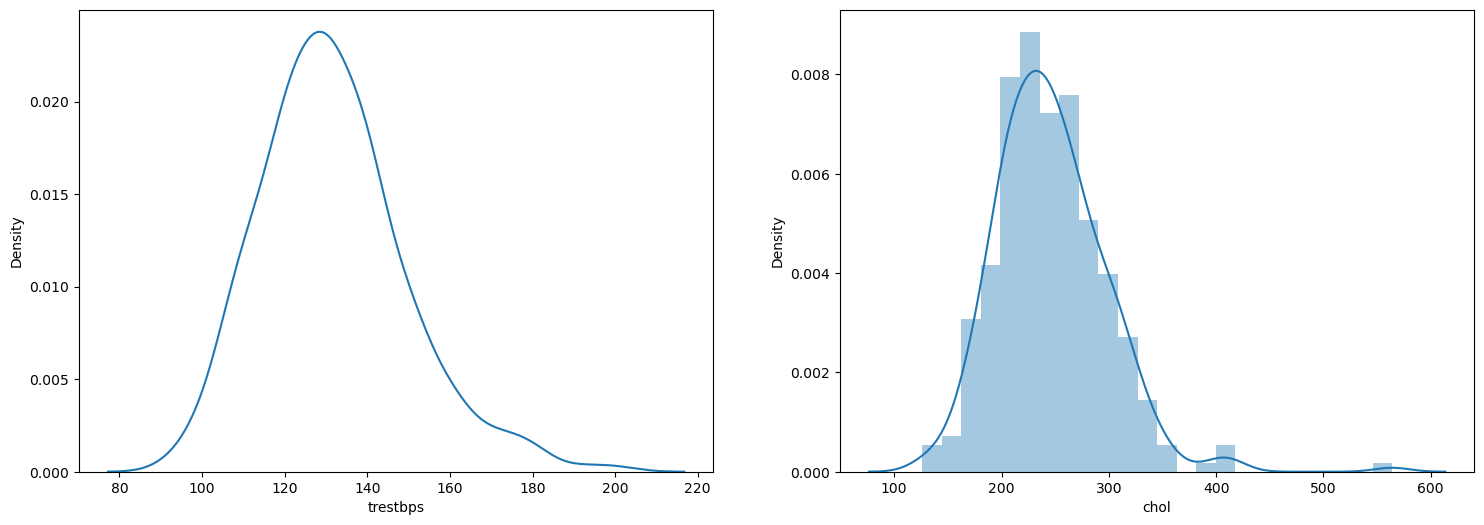

In [9]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['trestbps'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['chol'], ax=ax2)

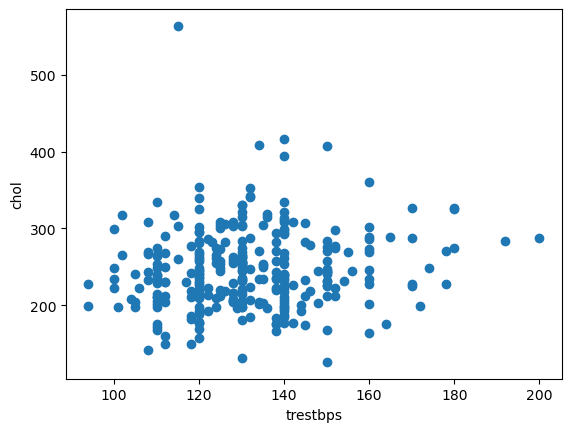

In [10]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['trestbps'], df['chol'])
plt.xlabel('trestbps')
plt.ylabel('chol')

plt.show()

In [11]:
#인덱스 중복 .. 떄문에 pairplot 오류가 났음 (0 이상이면 중복인 것 / 262개의 인덱스가 중복이라는 뜻)
print(df.index.duplicated().sum())


262


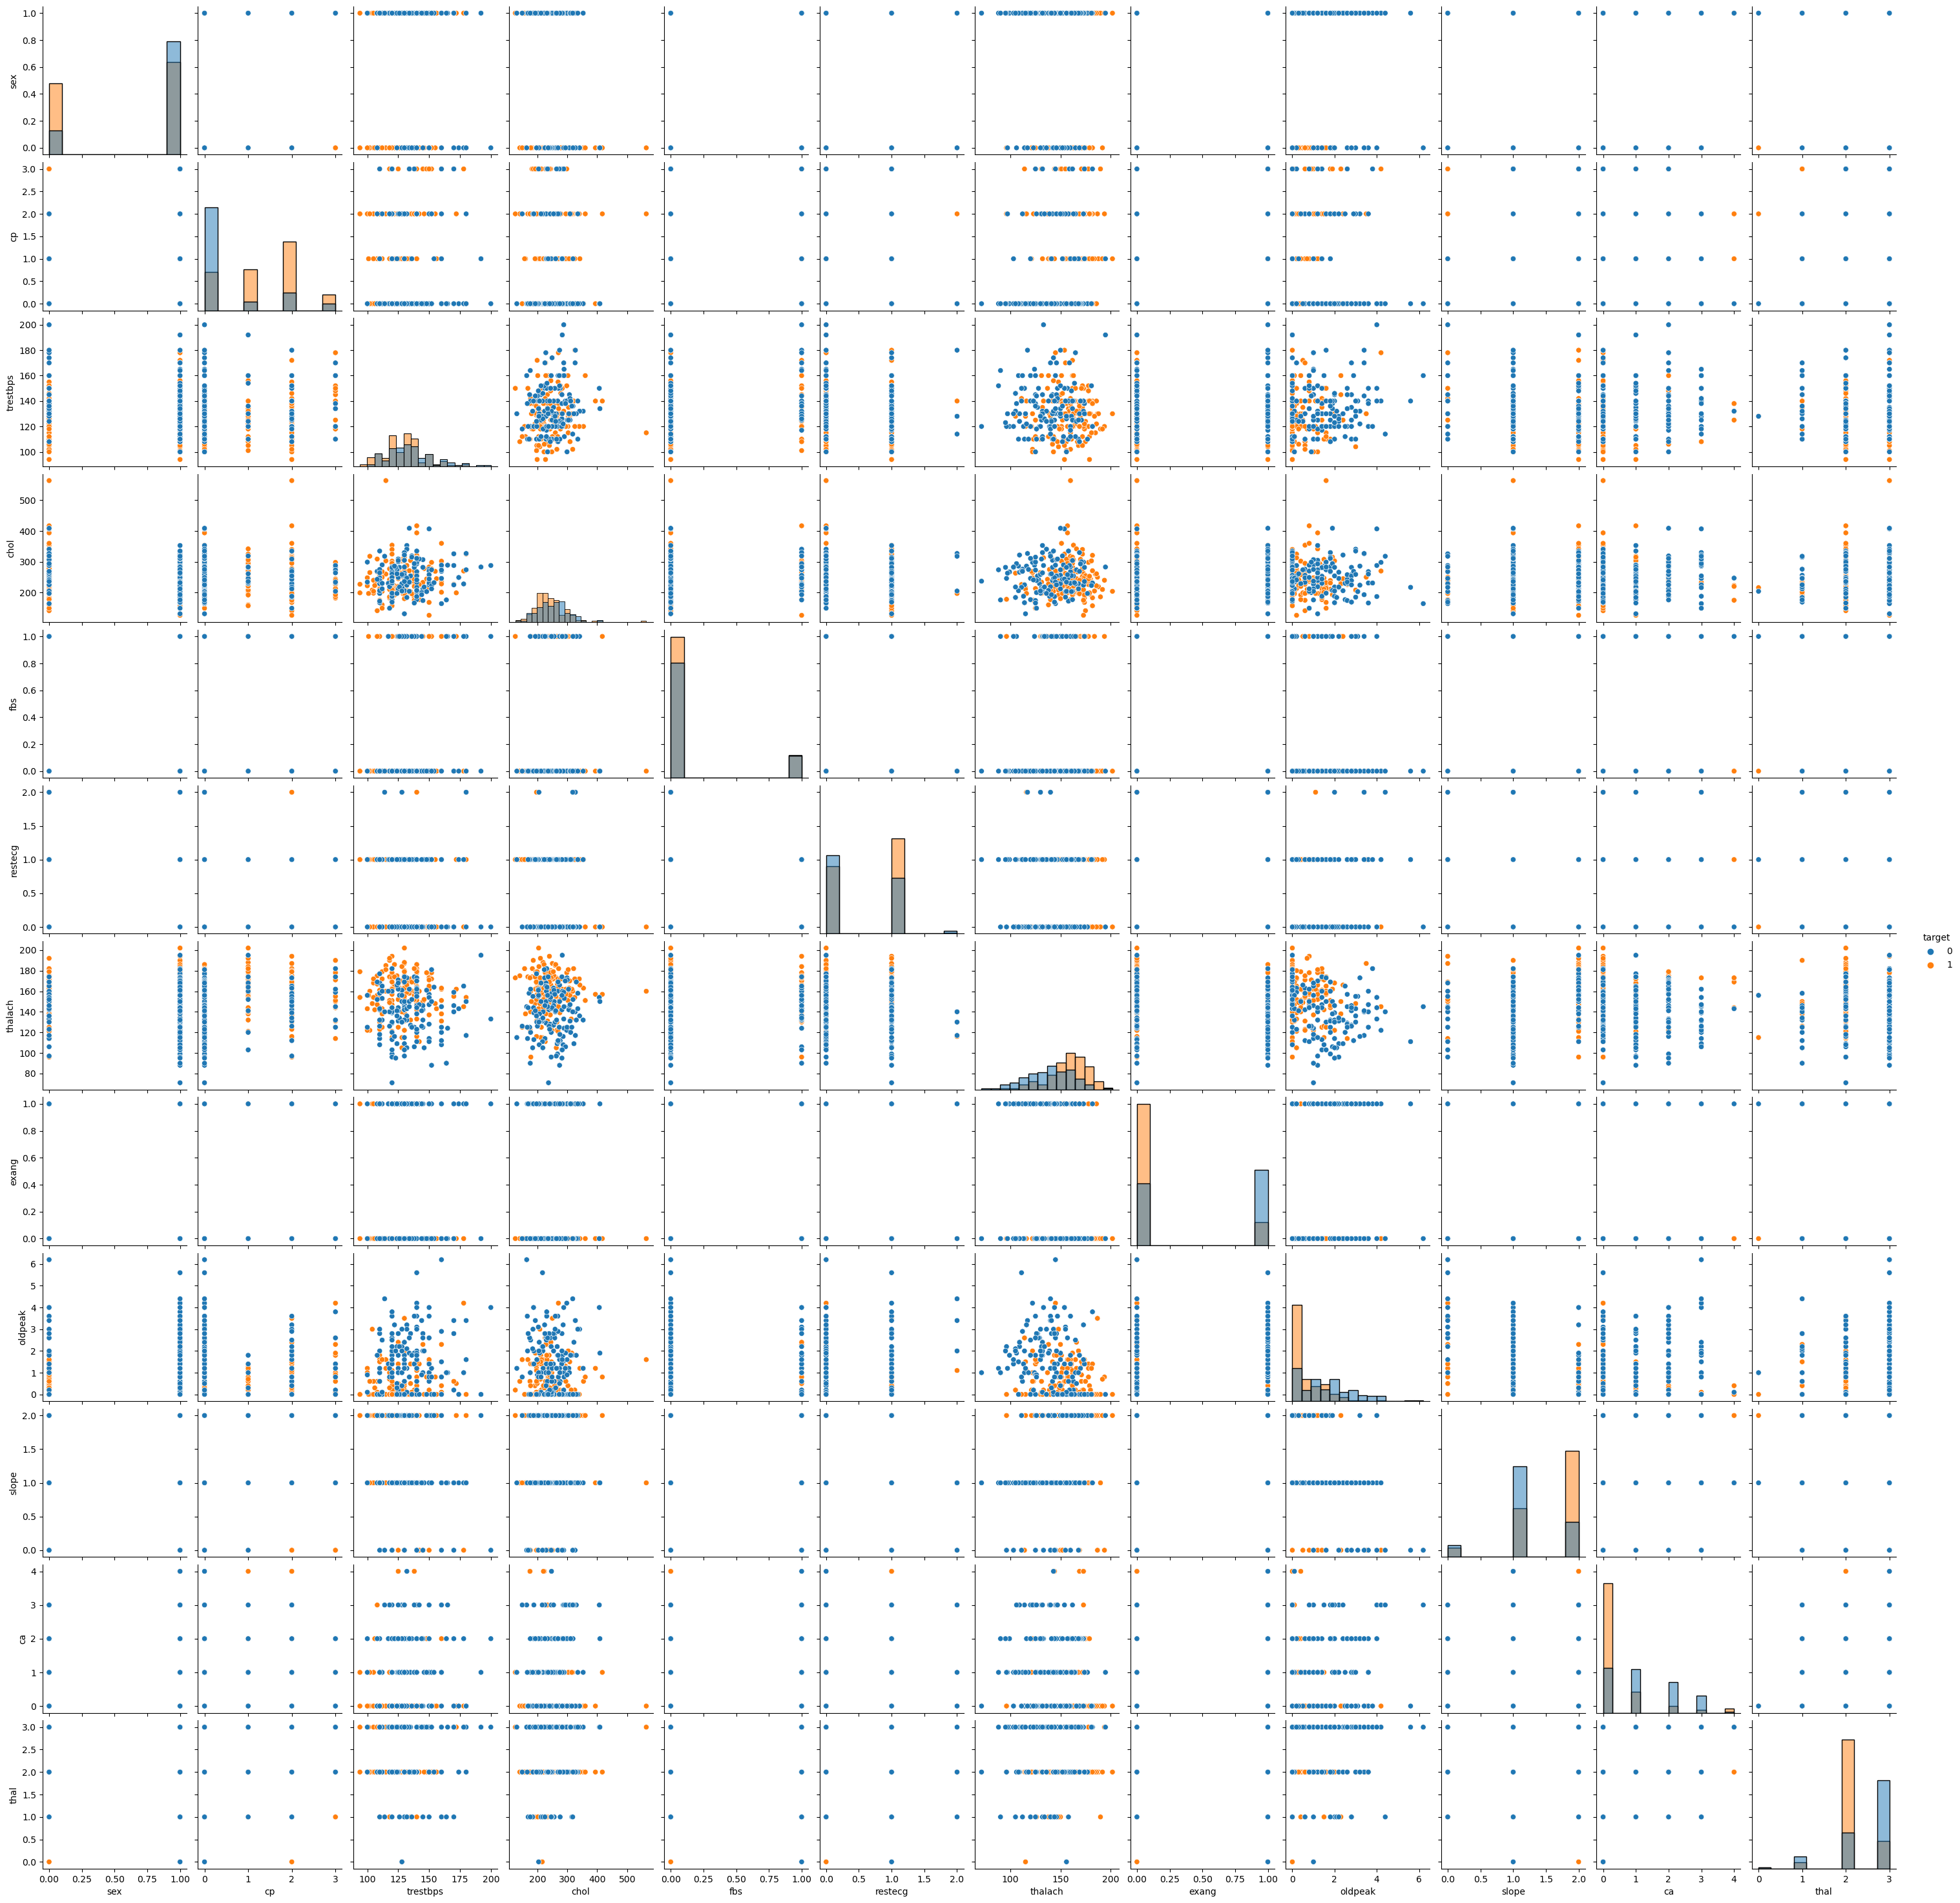

In [12]:
# pairplot를 사용해 각 상관관계 살펴보기 (각 컬럼 별 레이블에 얼마나 영향을 주는 지 알 수 있음)
df_clean = df.dropna()
df_reset = df.reset_index(drop=True)  # 중복 인덱스를 리셋



sns.pairplot(df_reset,
             vars=['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
            hue ='target',
            diag_kind='hist') # 대각선 히스토그램만 쓰도록 바꾸는 문장
plt.show()

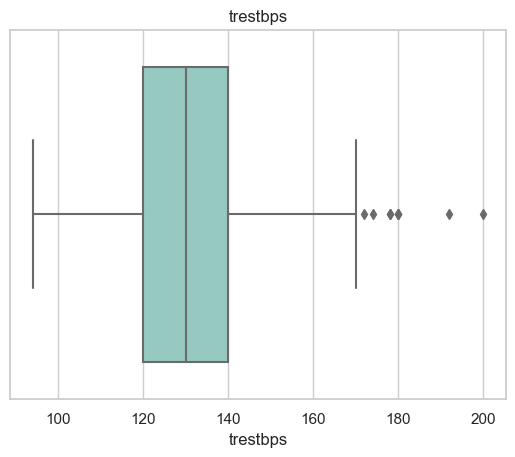

In [13]:

# 특정 칼럼의 범위 확인 및 outlier 확인



sns.set_theme(style="whitegrid")
sns.boxplot(x="trestbps", data=df, palette="Set3")
plt.title("trestbps")  # 수축기 혈압 (resting blood pressure)
plt.show()


C:\Users\hanyo\AppData\Local\Temp\ipykernel_31044\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


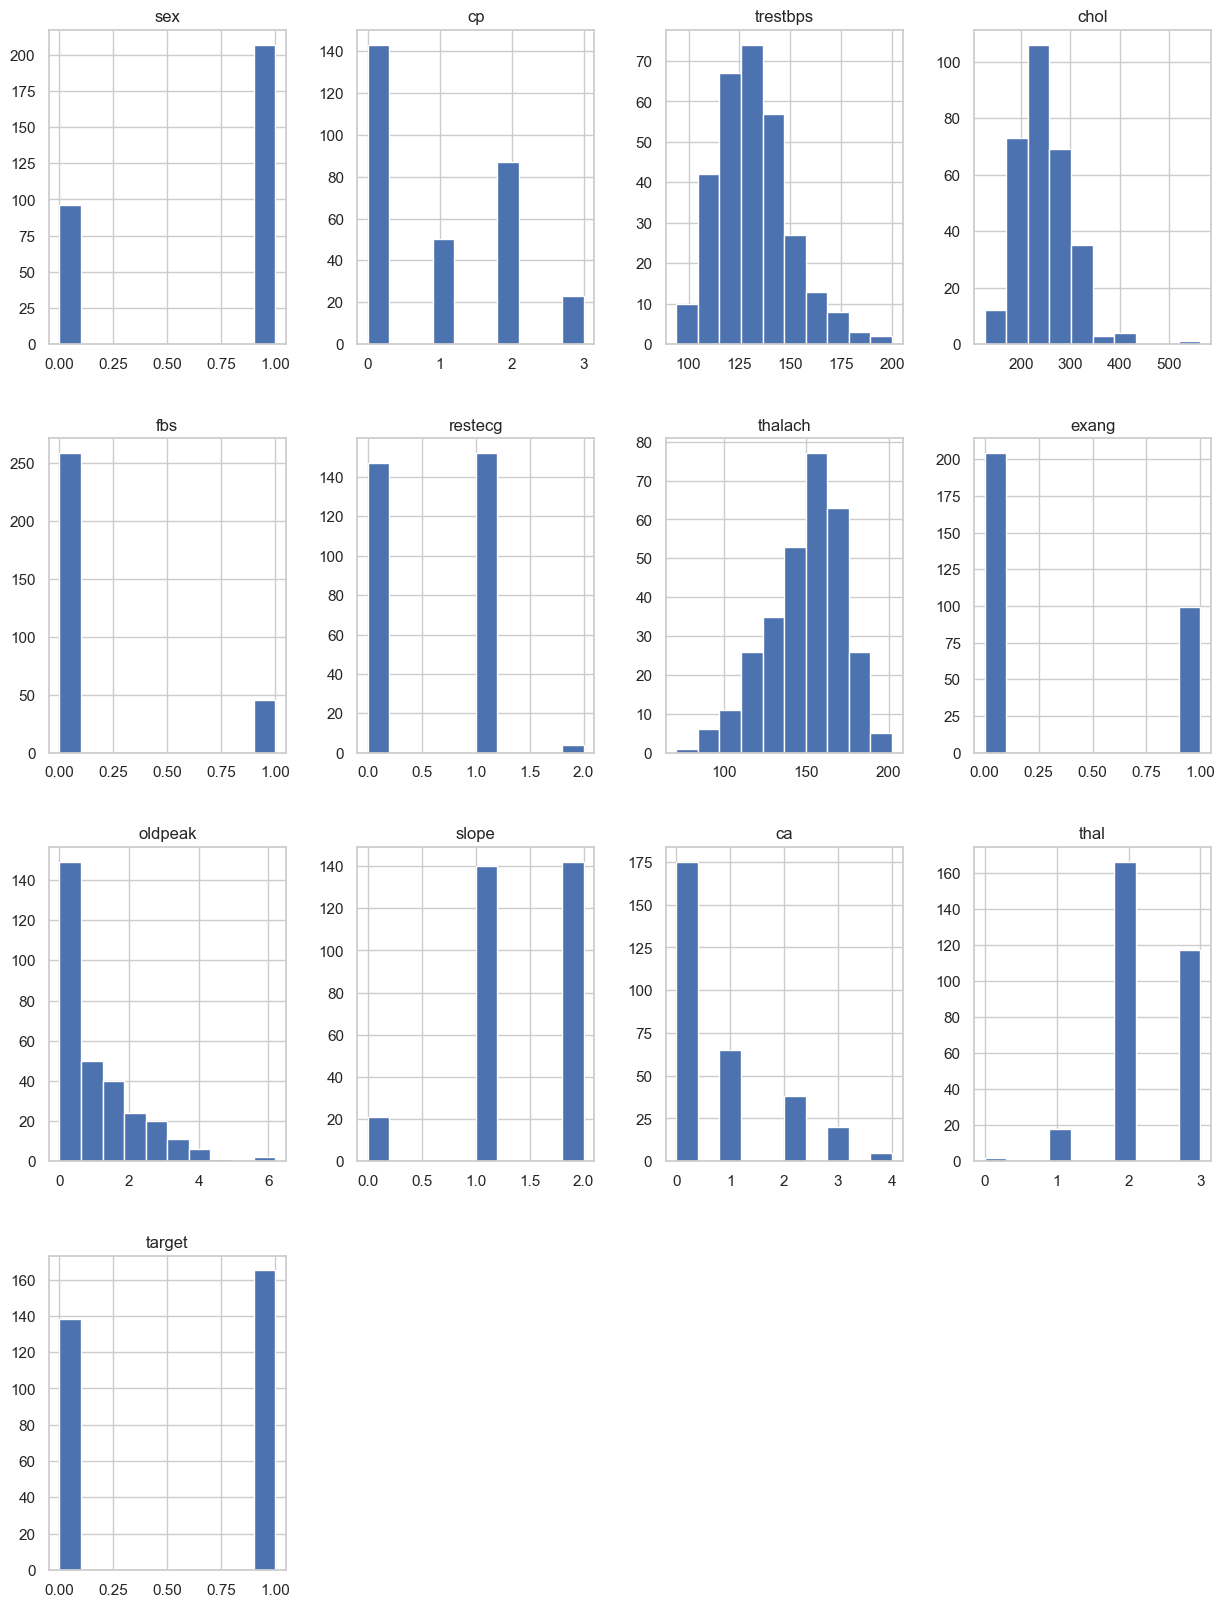

In [14]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [15]:
X=df.drop('target',axis=1)
y=df['target']

In [16]:
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2
41,0,1,130,204,0,0,172,0,1.4,2,0,2
56,1,1,120,236,0,1,178,0,0.8,2,0,2
57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [18]:
y.head()

age
63    1
37    1
41    1
56    1
57    1
Name: target, dtype: int64

In [19]:
#  원핫인코딩
Y = pd.get_dummies(y).values

# 딥러닝을 위한 numpy 변환
X = X.values

In [20]:
X

array([[  1.,   3., 145., ...,   0.,   0.,   1.],
       [  1.,   2., 130., ...,   0.,   0.,   2.],
       [  0.,   1., 130., ...,   2.,   0.,   2.],
       ...,
       [  1.,   0., 144., ...,   1.,   2.,   3.],
       [  1.,   0., 130., ...,   1.,   1.,   3.],
       [  0.,   1., 130., ...,   1.,   1.,   2.]])

In [21]:
y

age
63    1
37    1
41    1
56    1
57    1
     ..
57    0
45    0
68    0
57    0
57    0
Name: target, Length: 303, dtype: int64

In [24]:

Y
# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [40]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(12,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(learning_rate=0.01),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286 (1.12 KB)

 Trainable params: 286 (1.12 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
uint8
float64
uint8


In [41]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4995 - loss: 4.8845 - val_accuracy: 0.4426 - val_loss: 0.6968
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4535 - loss: 0.6973 - val_accuracy: 0.4426 - val_loss: 0.6970
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4497 - loss: 0.6967 - val_accuracy: 0.4426 - val_loss: 0.6962
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4343 - loss: 0.6964 - val_accuracy: 0.4426 - val_loss: 0.6948
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4153 - loss: 0.6955 - val_accuracy: 0.4426 - val_loss: 0.6936
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4921 - loss: 0.6931 - val_accuracy: 0.5574 - val_loss: 0.6926
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5488 - loss: 0.6926 - val_accuracy: 0.5574 - val_loss: 0.6915
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5421 - loss: 0.6917 - val_accuracy: 0.5574 - val_loss: 0.6904


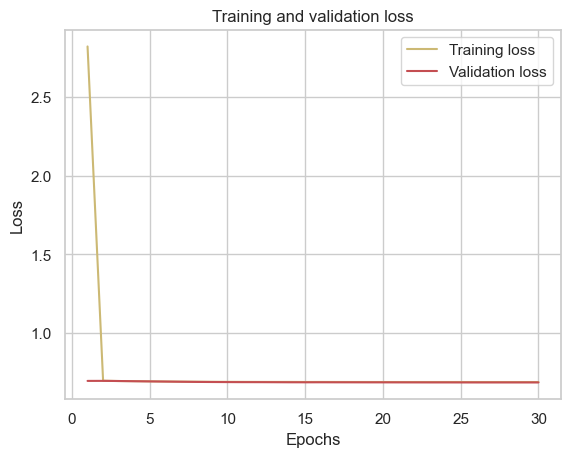

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

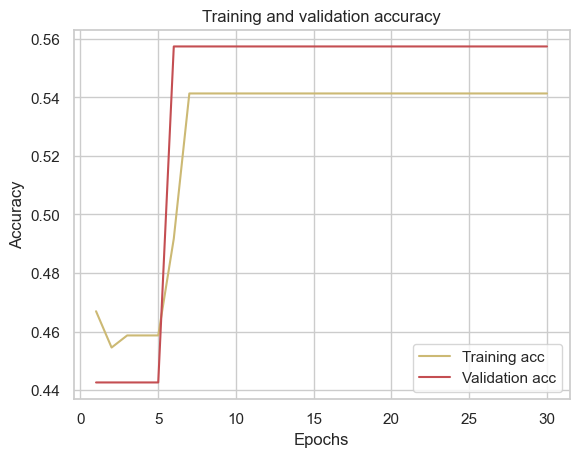

In [43]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.56      1.00      0.72        34

    accuracy                           0.56        61
   macro avg       0.28      0.50      0.36        61
weighted avg       0.31      0.56      0.40        61

[[ 0 27]
 [ 0 34]]


C:\Users\hanyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hanyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hanyo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
